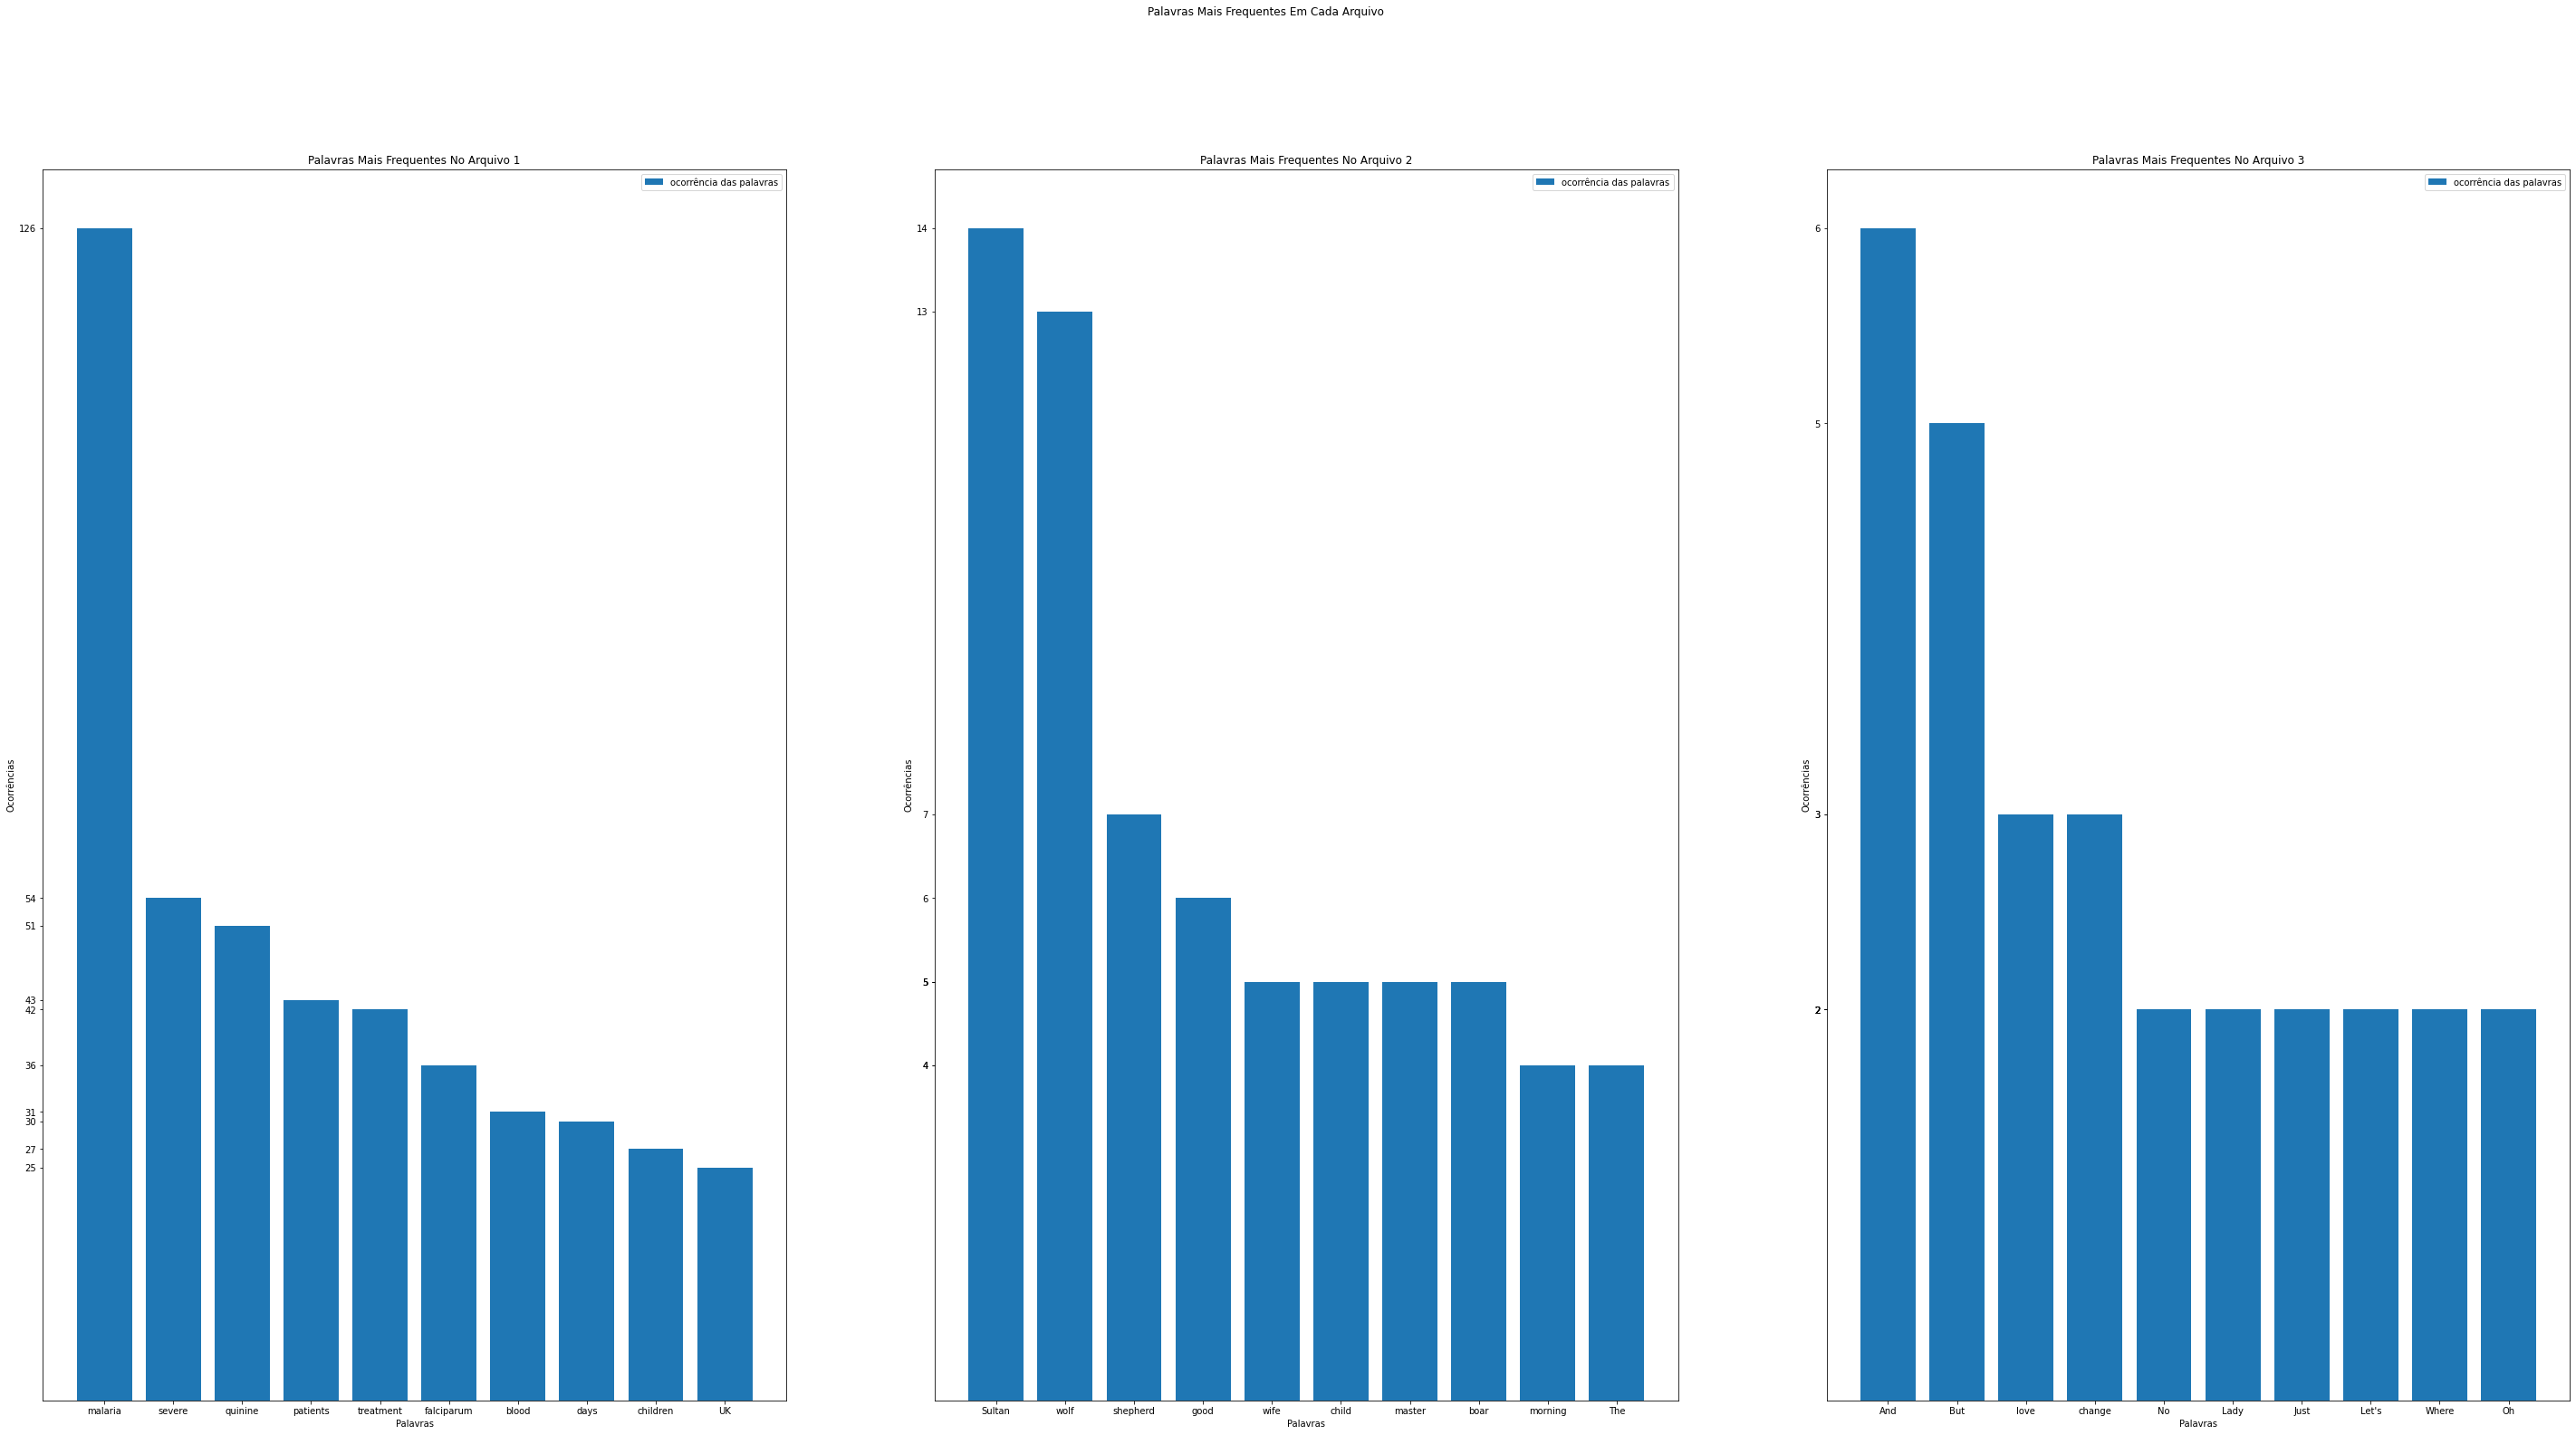

In [5]:
def importaTextos(stopwords, *textos):
  listaTextos = list()

  with open(stopwords, encoding='utf-8') as f:
    listaTextos.append(f.read())

  for texto in textos:
    with open(texto, encoding='utf-8') as f:
      listaTextos.append(f.read())

  return listaTextos


def trataTextos(listaTextos):
  import re

  for i in range(0, len(listaTextos)):
    listaTextos[i] = re.sub(r'[^\w\s\-\']|\d|\t', '', listaTextos[i])
    listaTextos[i] = re.sub(r'\n', ' ', listaTextos[i])
    listaTextos[i] = re.split(' ', listaTextos[i])

  return listaTextos


def filtraTextos(listaTextos):
  for i in range(1, len(listaTextos)):
    listaTextos[i] = list(filter(lambda palavra: palavra not in listaTextos[0], listaTextos[i]))
  
  return listaTextos


def contaOcorrencias(listaTextos):
  for i in range(1, len(listaTextos)):
    listaTextos[i]  = [[palavra, listaTextos[i].count(palavra)] for palavra in listaTextos[i]]
    
  for texto in listaTextos:
    for palavra in texto:    
      for i in range(0, texto.count(palavra) - 1):
        texto.remove(palavra)    

      if palavra[0] == '':
        texto.remove(palavra)
                  
  return listaTextos


def plotaGraficoOcorrencias(listaTextos):
  import matplotlib.pyplot as plt
  
  # Ordenando a lista pelo número de ocorrências 
  for i in range(1, len(listaTextos)):
    listaTextos[i] = sorted(listaTextos[i], key=lambda dado: dado[1], reverse=True)

  # criando a figura a ser plotada
  figura = plt.figure(figsize=(50,25))
  figura.suptitle('Palavras Mais Frequentes Em Cada Arquivo')

  # criando os eixos x e y do gráfico:
  for i in range(1, len(listaTextos)):
    x = [palavra[0] for palavra in listaTextos[i]][0:10]
    y = [palavra[1] for palavra in listaTextos[i]][0:10]
    figura.add_subplot(int(f'1{len(listaTextos)-1}{i}'))
    plt.bar(x, y, label='ocorrência das palavras')
    plt.title(f'Palavras Mais Frequentes No Arquivo {i}')
    plt.ylabel('Ocorrências')
    plt.xlabel('Palavras')
    plt.yticks([yi for yi in y])
    plt.legend()
  
  plt.show()


listaTextos = importaTextos('stopwords2.txt', 'texto5.txt', 'texto37.txt', 'noBuses.txt')

listaTextos = trataTextos(listaTextos)

listaTextos = filtraTextos(listaTextos)

ListaTextos = contaOcorrencias(listaTextos)

plotaGraficoOcorrencias(listaTextos)
